In [32]:
# import libraries
import pandas as pd
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Common word by star

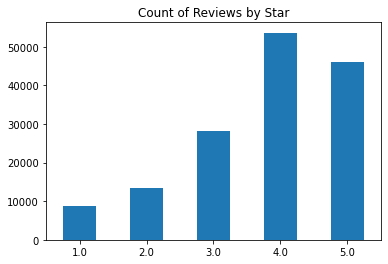

In [33]:
# import data
yelp_reviews = pd.read_csv("train_reviews.csv")
yelp_reviews.sort_values(by=["stars"])["stars"].value_counts(sort=False).plot(kind="bar", rot=0, title="Count of Reviews by Star")

In [34]:
# change text to lower case and remove punctuation
yelp_reviews["text"] = yelp_reviews["text"].str.lower()
yelp_reviews["text"] = yelp_reviews["text"].str.replace("[^\w\s]", "")

# tokenize words, remove stop words, and stem
stoplist = set(stopwords.words("english")) - {"no", "not", "very"}
def clean_text(text):
    text = word_tokenize(text)
    text = [word for word in text if word not in stoplist]
    return text
def bi_grams(text):
    return list(ngrams(text, 2))

yelp_reviews["text_clean"] = yelp_reviews["text"].apply(clean_text)
yelp_reviews["bigrams"] = yelp_reviews["text_clean"].apply(bi_grams)

In [35]:
# count words by star
top_words = pd.DataFrame(columns = ["stars", "word", "count"])
for star in range(1, 6):
    word_count = Counter()
    yelp_reviews.loc[yelp_reviews["stars"]==star]["text_clean"].apply(word_count.update)
    top = pd.DataFrame(word_count.most_common(15), columns=["word", "count"])
    top["stars"] = star
    top_words = top_words.append(top)

# count bigrams by star
top_bigrams = pd.DataFrame(columns = ["stars", "bigram", "count"])
for star in range(1, 6):
    word_count = Counter()
    yelp_reviews.loc[yelp_reviews["stars"]==star]["bigrams"].apply(word_count.update)
    top = pd.DataFrame(word_count.most_common(15), columns=["bigram", "count"])
    top["stars"] = star
    top_bigrams = top_bigrams.append(top)

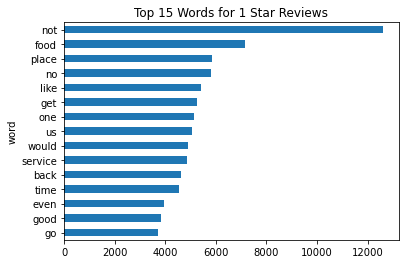

In [37]:
# 1 star reviews top words
top_words[top_words["stars"]==1].sort_values(by="count").plot(x="word", y="count", kind="barh", legend=False, title="Top 15 Words for 1 Star Reviews")

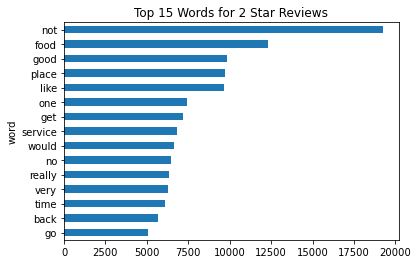

In [38]:
# 2 star reviews top words
top_words[top_words["stars"]==2].sort_values(by="count").plot(x="word", y="count", kind="barh", legend=False, title="Top 15 Words for 2 Star Reviews")

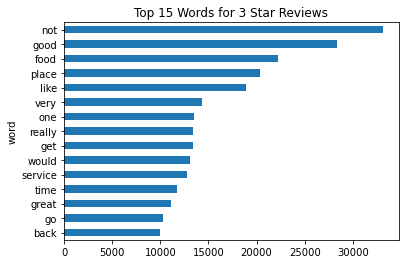

In [39]:
# 3 star reviews top words
top_words[top_words["stars"]==3].sort_values(by="count").plot(x="word", y="count", kind="barh", legend=False, title="Top 15 Words for 3 Star Reviews")

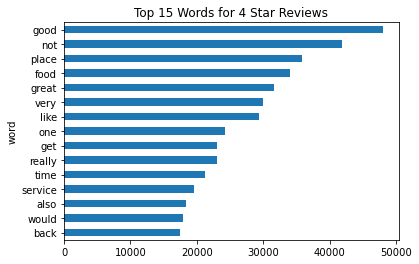

In [40]:
# 4 star reviews top words
top_words[top_words["stars"]==4].sort_values(by="count").plot(x="word", y="count", kind="barh", legend=False, title="Top 15 Words for 4 Star Reviews")

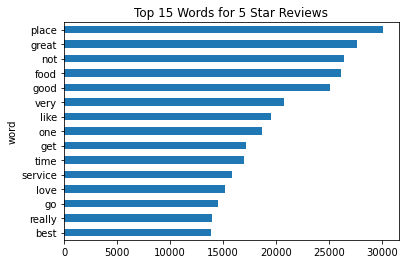

In [41]:
# 5 star reviews top words
top_words[top_words["stars"]==5].sort_values(by="count").plot(x="word", y="count", kind="barh", legend=False, title="Top 15 Words for 5 Star Reviews")

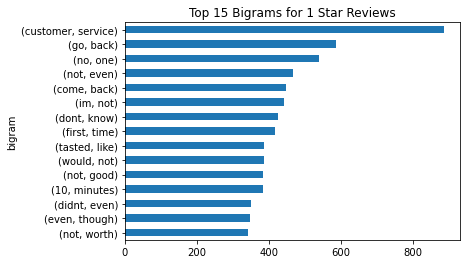

In [42]:
# 1 star reviews top bigrams
top_bigrams[top_bigrams["stars"]==1].sort_values(by="count").plot(x="bigram", y="count", kind="barh", legend=False, title="Top 15 Bigrams for 1 Star Reviews")

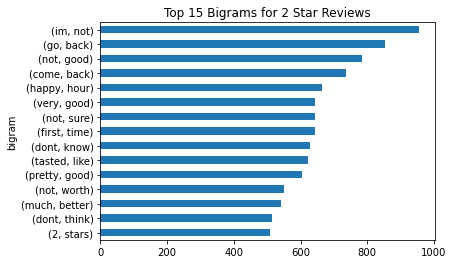

In [43]:
# 2 star reviews top bigrams
top_bigrams[top_bigrams["stars"]==2].sort_values(by="count").plot(x="bigram", y="count", kind="barh", legend=False, title="Top 15 Bigrams for 2 Star Reviews")

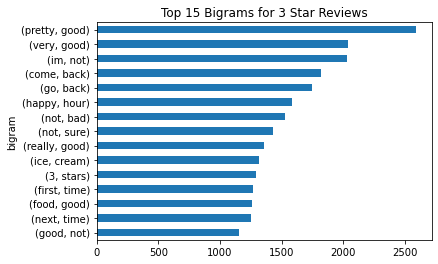

In [44]:
# 3 star reviews top bigrams
top_bigrams[top_bigrams["stars"]==3].sort_values(by="count").plot(x="bigram", y="count", kind="barh", legend=False, title="Top 15 Bigrams for 3 Star Reviews")

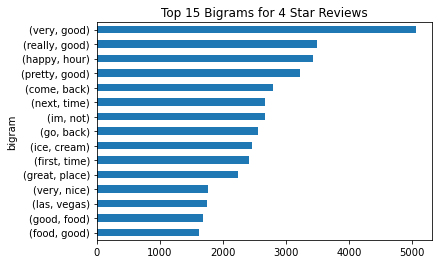

In [45]:
# 4 star reviews top bigrams
top_bigrams[top_bigrams["stars"]==4].sort_values(by="count").plot(x="bigram", y="count", kind="barh", legend=False, title="Top 15 Bigrams for 4 Star Reviews")

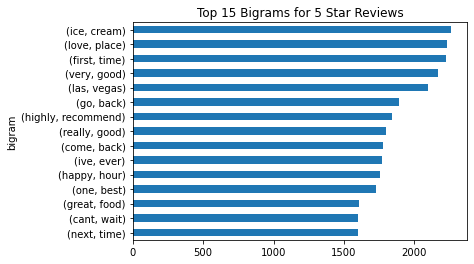

In [46]:
# 5 star reviews top bigrams
top_bigrams[top_bigrams["stars"]==5].sort_values(by="count").plot(x="bigram", y="count", kind="barh", legend=False, title="Top 15 Bigrams for 5 Star Reviews")

In [47]:
#word_plot = sns.FacetGrid(top_words, col="stars", col_wrap=3, sharex=False, sharey=False, aspect=1, height=5)
#word_plot.map(sns.barplot, "count", "word")
#word_plot.set_xlabels("")
#word_plot.savefig("output.png")